In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit
import sklearn.cluster as cluster
import sklearn.metrics as skmet
import random
import matplotlib.pyplot as plt
import cluster_tools as ct
import matplotlib.patches as mpatches
import scipy.optimize as opt
import numpy as np
import errors as err

In [70]:
GDP_per_cap = pd.read_csv('GDPpercapita.csv', skiprows=4)
GDP_per_cap = GDP_per_cap.dropna().drop(['Indicator Code', 'Country Code', 'Indicator Name'], axis=1)
GDP_per_cap.set_index('Country Name', drop=True, inplace=True)
GDP_per_cap

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,224.239783,249.589133,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
Africa Western and Central,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,128.365494,142.325904,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
Australia,1810.510249,1877.509803,1854.552575,1967.014259,2131.277657,2280.902108,2343.706917,2579.986339,2723.999484,2991.241889,...,68044.714820,68158.579740,62513.411220,56710.445720,49875.565140,53936.140250,57207.871510,54941.434180,51720.370760,60443.109160
Austria,935.460427,1031.815004,1087.834243,1167.000532,1269.412583,1374.532140,1486.968606,1569.667183,1677.673528,1825.386126,...,48564.917340,50731.127250,51786.377170,44195.817590,45307.587860,47429.158460,51466.556560,50070.403350,48809.226880,53637.705710
Burundi,71.360224,72.088782,73.942008,78.948269,85.964725,50.990420,51.808640,54.450305,54.647466,55.543775,...,238.205949,241.547671,257.818552,289.359633,242.065671,243.135809,231.446476,216.972968,216.826741,221.477676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St. Vincent and the Grenadines,155.293588,163.424034,166.602193,154.653976,163.883606,165.126044,173.196917,167.777520,160.299923,171.426806,...,6754.370184,7117.554763,7210.616623,7386.737595,7684.779208,8030.585057,8399.694011,8674.371009,8335.256476,8666.387041
World,459.258877,471.478181,495.867174,523.439951,561.348693,599.077420,636.708777,663.848225,701.986970,758.346683,...,10572.957670,10735.129020,10896.145030,10153.581300,10206.892280,10742.650460,11285.497640,11320.915880,10883.076050,12236.615740
South Africa,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,813.508497,887.246703,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776


In [72]:
# Randomly select 60 countries
selected_countries = random.sample(list(GDP_per_cap.index), 60)
df_selected = GDP_per_cap.loc[selected_countries]

df_selected

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Nepal,49.993840,51.321965,54.309576,46.087448,45.088334,65.456271,79.058083,71.867897,64.511456,64.474337,...,794.092770,809.384601,827.744346,882.307449,880.224488,1027.965486,1161.534374,1185.682675,1139.190277,1208.218534
France,1333.881573,1430.434624,1585.735311,1758.856659,1928.999402,2060.299715,2209.000173,2363.669669,2553.975843,2767.615431,...,40870.852360,42602.717970,43068.548720,36652.922310,37062.533570,38781.049490,41557.854860,40494.898290,39055.282930,43658.978980
Uganda,55.529337,56.328059,55.647806,62.104078,68.776819,100.222940,101.680004,103.013154,107.031304,116.828520,...,796.711135,819.757881,897.509742,864.180062,753.684409,766.177606,793.128081,823.138950,846.767201,883.892032
Malawi,45.002236,47.078593,48.199228,49.007297,48.801626,56.113956,62.135399,62.809571,55.677008,58.900691,...,386.906541,344.396771,367.024270,376.246205,312.142797,500.165547,537.932204,584.362867,628.699482,634.835660
Bolivia,100.843655,107.453658,115.074813,121.347916,133.886394,146.853478,159.177348,175.962921,195.457687,207.224548,...,2562.466784,2853.797162,3022.462884,2975.648811,3013.502708,3280.008213,3471.006951,3472.380831,3068.812555,3345.196589
Seychelles,288.057842,270.279363,287.044788,308.195264,332.305003,328.484901,337.646247,333.233812,314.351065,314.179853,...,11998.447200,14764.939270,15188.228760,15157.530290,15740.130320,16416.776190,16910.688180,17253.505660,12808.987470,14653.309390
East Asia & Pacific (excluding high income),90.740175,79.925638,72.032174,76.083347,85.704316,97.369755,103.625853,98.019286,96.706695,105.657980,...,5376.041081,5882.272406,6291.464864,6501.868829,6591.282343,7149.207647,7944.551234,8169.167837,8262.479253,9771.648206
Gabon,275.585340,322.797126,347.684538,290.053632,399.532918,413.625221,442.376368,481.088521,513.359340,544.148931,...,9348.515572,9250.081564,9255.368597,7090.454610,6722.198393,6975.695793,7694.906045,7523.862278,6680.082670,8635.325694
Niger,128.530591,134.845577,143.283953,153.372020,148.035350,166.123009,168.315402,154.993738,145.138272,137.765548,...,525.047324,548.157876,560.754509,481.111299,497.036133,514.543313,567.330807,550.963555,564.822002,590.629455


In [74]:
# List of countries to remove not needed
countries_to_remove = ['East Asia & Pacific (excluding high income)	',
                       'IDA total',
                       'Euro area',
                       'Sub-Saharan Africa',
                       'IDA & IBRD total',
                       'North America',
                       'Middle income',
                       'Lower middle income',
                       'South Asia (IDA & IBRD)',
                       'Latin America & Caribbean (excluding high income)',
                       'IDA only','Latin America & the Caribbean (IDA & IBRD countries)','Sub-Saharan Africa (IDA & IBRD countries)	', 'Early-demographic dividend', 'Pre-demographic dividend', 'Low & middle income', 'Africa Eastern and Southern', 'East Asia & Pacific (excluding high income)', 'Euro area', 'Latin America & Caribbean', 'Africa Eastern and Southern', 'World', 'Sub-Saharan Africa (IDA & IBRD countries)']

# Remove the countries from the DataFrame
df_selected = df_selected[~df_selected.index.isin(countries_to_remove)]


# Print the resulting DataFrame
print(df_selected.index)

Index(['Nepal', 'France', 'Uganda', 'Malawi', 'Bolivia', 'Seychelles', 'Gabon',
       'Niger', 'Korea, Rep.', 'Malaysia', 'Guatemala', 'Spain', 'Cameroon',
       'Zimbabwe', 'Belgium', 'Austria', 'Kenya', 'United Kingdom', 'Canada',
       'Colombia', 'Puerto Rico', 'Togo', 'South Africa', 'Netherlands',
       'Jamaica', 'Philippines', 'Papua New Guinea', 'Italy', 'Bermuda',
       'Uruguay', 'United States', 'Benin', 'Belize', 'Trinidad and Tobago',
       'Eswatini', 'Honduras', 'Senegal', 'Ghana', 'Congo, Rep.', 'Turkiye',
       'Rwanda'],
      dtype='object', name='Country Name')


In [81]:
GDP_per_cap1 = df_selected[["1960", "1970", "1980", "1990", "2000", "2010", "2020"]]
GDP_per_cap1

,1960,1970,1980,1990,2000,2010,2020
Country Name,,,,,,,
Nepal,49.993840,69.270904,124.734708,184.923756,223.711892,589.165435,1139.190277
France,1333.881573,2870.157510,12738.520050,21865.555250,22416.425420,40676.064790,39055.282930
Uganda,55.529337,122.134161,93.692229,244.754047,257.829606,824.737678,846.767201
Malawi,45.002236,62.815733,197.476080,197.152789,155.262841,472.853379,628.699482
Bolivia,100.843655,221.777465,791.042223,685.942718,977.336056,1922.049531,3068.812555
Seychelles,288.057842,343.881182,2329.353358,5302.843727,7578.851053,10804.684470,12808.987470
Gabon,275.585340,542.208327,5713.207348,6055.060248,3991.157022,8399.596703,6680.082670
Niger,128.530591,139.177162,406.358701,419.603877,192.877720,471.612652,564.822002
"Korea, Rep.",158.274637,279.304969,1715.429460,6610.036508,12256.993570,23087.225640,31721.298910


In [82]:
GDP_per_cap1 = GDP_per_cap1.drop(["1960"], axis=1)
GDP_per_cap1

,1970,1980,1990,2000,2010,2020
Country Name,,,,,,
Nepal,69.270904,124.734708,184.923756,223.711892,589.165435,1139.190277
France,2870.157510,12738.520050,21865.555250,22416.425420,40676.064790,39055.282930
Uganda,122.134161,93.692229,244.754047,257.829606,824.737678,846.767201
Malawi,62.815733,197.476080,197.152789,155.262841,472.853379,628.699482
Bolivia,221.777465,791.042223,685.942718,977.336056,1922.049531,3068.812555
Seychelles,343.881182,2329.353358,5302.843727,7578.851053,10804.684470,12808.987470
Gabon,542.208327,5713.207348,6055.060248,3991.157022,8399.596703,6680.082670
Niger,139.177162,406.358701,419.603877,192.877720,471.612652,564.822002
"Korea, Rep.",279.304969,1715.429460,6610.036508,12256.993570,23087.225640,31721.298910


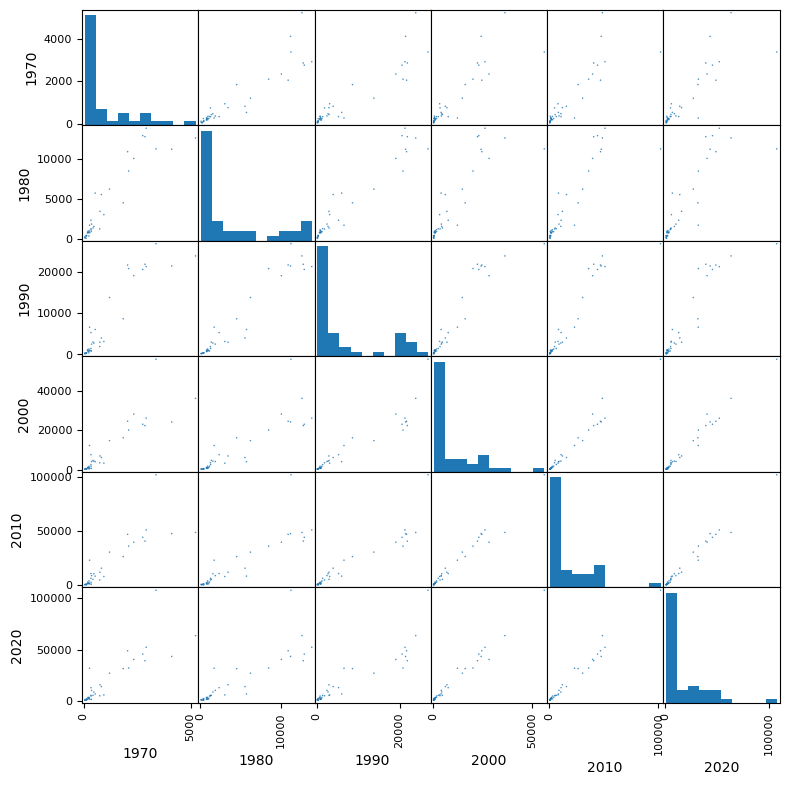

In [84]:
pd.plotting.scatter_matrix(GDP_per_cap1, figsize=(9, 9), s=5, alpha=0.8)

plt.show()

In [85]:
# extract columns for fitting. 
# .copy() prevents changes in df_fit to affect df_fish.
GDP_per_cap1_fit = GDP_per_cap1[["1980", "2020"]].copy()

# normalise dataframe and inspect result
# normalisation is done only on the extract columns. .copy() prevents
# changes in df_fit to affect df_fish. This make the plots with the 
# original measurements
GDP_per_cap1_fit, df_min, df_max = ct.scaler(GDP_per_cap1_fit)
print(GDP_per_cap1_fit.describe())

print("n   score")
# loop over trial numbers of clusters calculating the silhouette
for ic in range(2, 7):
    # set up kmeans and fit
    kmeans = cluster.KMeans(n_clusters=ic)
    kmeans.fit(GDP_per_cap1_fit)     

    # extract labels and calculate silhoutte score
    labels = kmeans.labels_
    print (ic, skmet.silhouette_score(GDP_per_cap1_fit, labels))

            1980       2020
count  41.000000  41.000000
mean    0.269280   0.150968
std     0.326864   0.214220
min     0.000000   0.000000
25%     0.050351   0.011878
50%     0.086311   0.043851
75%     0.410238   0.287512
max     1.000000   1.000000
n   score
2 0.7653427485938645
3 0.6699384358773693
4 0.6615202670261275
5 0.5830682042466646
6 0.5614551238801182


Cluster 0
['Nepal', 'Uganda', 'Malawi', 'Bolivia', 'Seychelles', 'Gabon', 'Niger', 'Korea, Rep.', 'Malaysia', 'Guatemala', 'Spain', 'Cameroon', 'Zimbabwe', 'Kenya', 'Colombia', 'Puerto Rico', 'Togo', 'South Africa', 'Jamaica', 'Philippines', 'Papua New Guinea', 'Uruguay', 'Benin', 'Belize', 'Trinidad and Tobago', 'Eswatini', 'Honduras', 'Senegal', 'Ghana', 'Congo, Rep.', 'Turkiye', 'Rwanda']

Cluster 1
['France', 'Belgium', 'Austria', 'United Kingdom', 'Canada', 'Netherlands', 'Italy', 'Bermuda', 'United States']



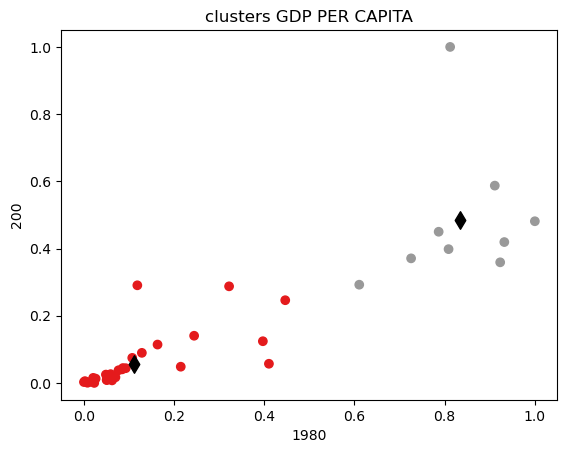

In [87]:
# Fit k-means with 2 clusters
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(GDP_per_cap1_fit)

# Add cluster label column to the original dataframe
GDP_per_cap1["cluster_label"] = kmeans.labels_

# Group countries by cluster label
grouped = GDP_per_cap1.groupby("cluster_label")

# Print countries in each cluster
for label, group in grouped:
    print("Cluster", label)
    print(group.index.tolist())
    print()

# Plot clusters with labels
plt.scatter(GDP_per_cap1_fit["1980"], GDP_per_cap1_fit["2020"], c=kmeans.labels_, cmap="Set1")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="k", marker="d", s=80)
plt.xlabel("1980")
plt.ylabel("200")
plt.title("clusters GDP PER CAPITA")
plt.show()

In [88]:
df_pop = pd.read_csv("populationwbdata.csv", skiprows=4)

df_pop = df_pop.dropna().drop(['Indicator Code', 'Country Code', 'Indicator Name'], axis=1)

df_pop.set_index('Country Name', drop=True, inplace=True)
df_pop

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,59330.0,...,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0
Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,167596160.0,...,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0
Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,10494489.0,...,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0
Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,118615741.0,...,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0
Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,5928386.0,...,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0
"Yemen, Rep.",5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,6515904.0,6673981.0,...,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0
South Africa,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,21050540.0,21704214.0,...,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0


In [89]:
countries = ['Korea, Rep.', 'United States']

df_pop_countries = df_pop.loc[countries]

df_pop_countries = df_pop_countries.transpose()
df_pop_countries = df_pop_countries.rename_axis('Year')

df_pop_countries = df_pop_countries.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

df_pop_countries

Country Name,"Korea, Rep.",United States
Year,,
1960,25012374.0,180671000.0
1961,25765673.0,183691000.0
1962,26513030.0,186538000.0
1963,27261747.0,189242000.0
1964,27984155.0,191889000.0
...,...,...
2017,51361911.0,325122128.0
2018,51585058.0,326838199.0
2019,51764822.0,328329953.0


Fit parameter [6.71844435e+08 1.63906789e-02 2.02060279e+03]


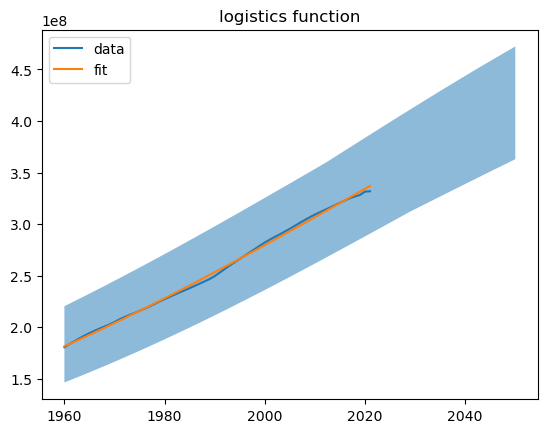

In [91]:
def logistics(t, a, k, t0):
    """ Computes logistics function with scale and incr as free parameters
    """
    f = a / (1.0 + np.exp(-k * (t - t0)))
    return f

# Convert index to numeric and use it in curve fitting
df_pop_countries.index = pd.to_numeric(df_pop_countries.index)

popt, pcorr = opt.curve_fit(logistics, df_pop_countries.index, df_pop_countries["United States"], p0=(16e8, 0.04, 1985.0))
print("Fit parameter", popt)

# extract variances and calculate sigmas
sigmas = np.sqrt(np.diag(pcorr))

df_pop_countries["pop_logistics"] = logistics(df_pop_countries.index, *popt)

# call function to calculate upper and lower limits with extrapolation
# create extended year range
years = np.arange(1960, 2051)
lower, upper = err.err_ranges(years, logistics, popt, sigmas)

plt.figure()
plt.title("logistics function")
plt.plot(df_pop_countries.index, df_pop_countries["United States"], label="data")
plt.plot(df_pop_countries.index, df_pop_countries["pop_logistics"], label="fit")

# plot error ranges with transparency
plt.fill_between(years, lower, upper, alpha=0.5)

plt.legend(loc="upper left")
plt.show()


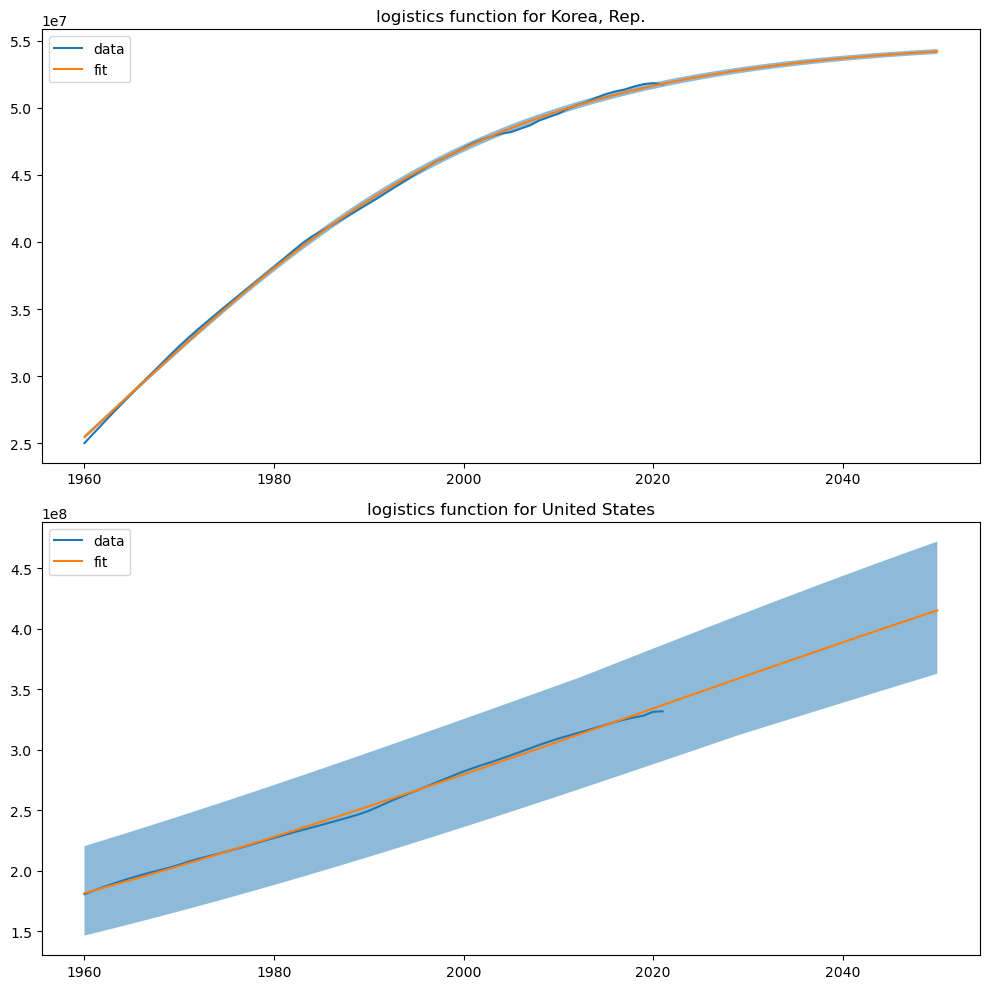

In [92]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))  # create 2 subplots in 1 column

countries = ['Korea, Rep.', 'United States']
# Different initial parameters for each country
p0_values = [(16e8, 0.04, 1985.0), (16e8, 0.03, 1980.0)]  # adjust these initial guesses as needed

# Apply the curve fitting for each country
for i, country in enumerate(countries):
    popt, pcorr = opt.curve_fit(logistics, df_pop_countries.index, df_pop_countries[country], p0=p0_values[i], maxfev=10000)

    # extract variances and calculate sigmas
    sigmas = np.sqrt(np.diag(pcorr))

    # create extended year range
    years = np.arange(1960, 2051)

    # Calculate the fitted GDP and the confidence intervals
    pop_logistics = logistics(years, *popt)
    lower, upper = err.err_ranges(years, logistics, popt, sigmas)

    # Plot the original data, the fitted function, and the confidence ranges
    axs[i].plot(df_pop_countries.index, df_pop_countries[country], label="data")
    axs[i].plot(years, pop_logistics, label="fit")
    axs[i].fill_between(years, lower, upper, alpha=0.5)

    axs[i].set_title(f"logistics function for {country}")
    axs[i].legend(loc="upper left")

plt.tight_layout()  # adjust the subplots to fit in to the figure area.
plt.show()

Fit parameter [ 1.73146975e+08  7.70372468e+05  4.31025088e+04 -3.08983777e+02]


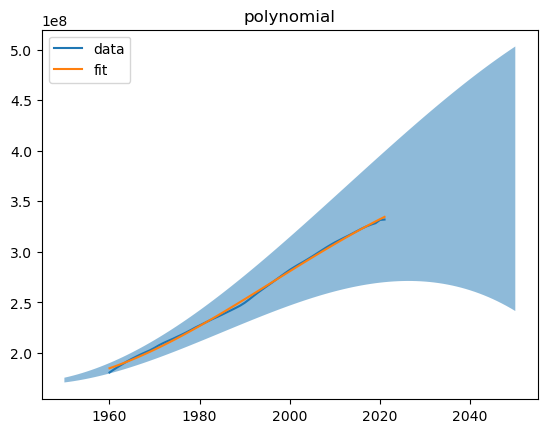

In [93]:
def poly(t, c0, c1, c2, c3):
    """ Computes a polynomial c0 + c1*t + c2*t^2 + c3*t^3
    """
    t = t - 1950
    f = c0 + c1*t + c2*t**2 + c3*t**3
    return f

# Use pop_countries.index instead of pop_countries["Year"]
popt, pcorr = opt.curve_fit(poly, df_pop_countries.index, df_pop_countries["United States"])
print("Fit parameter", popt)

# extract variances and calculate sigmas
sigmas = np.sqrt(np.diag(pcorr))

# call function to calculate upper and lower limits with extrapolation
# create extended year range
years = np.arange(1950, 2051)
lower, upper = err.err_ranges(years, poly, popt, sigmas)

df_pop_countries["poly"] = poly(df_pop_countries.index, *popt)

plt.figure()
plt.title("polynomial")
plt.plot(df_pop_countries.index, df_pop_countries["United States"], label="data")
plt.plot(df_pop_countries.index, df_pop_countries["poly"], label="fit")

# plot error ranges with transparency
plt.fill_between(years, lower, upper, alpha=0.5)

plt.legend(loc="upper left")
plt.show()


Fit parameters for Korea, Rep.:  [ 1.63999115e+07  9.27551727e+05 -7.27375401e+03  1.78848812e+01]
Fit parameters for United States:  [ 1.73146975e+08  7.70372468e+05  4.31025088e+04 -3.08983777e+02]


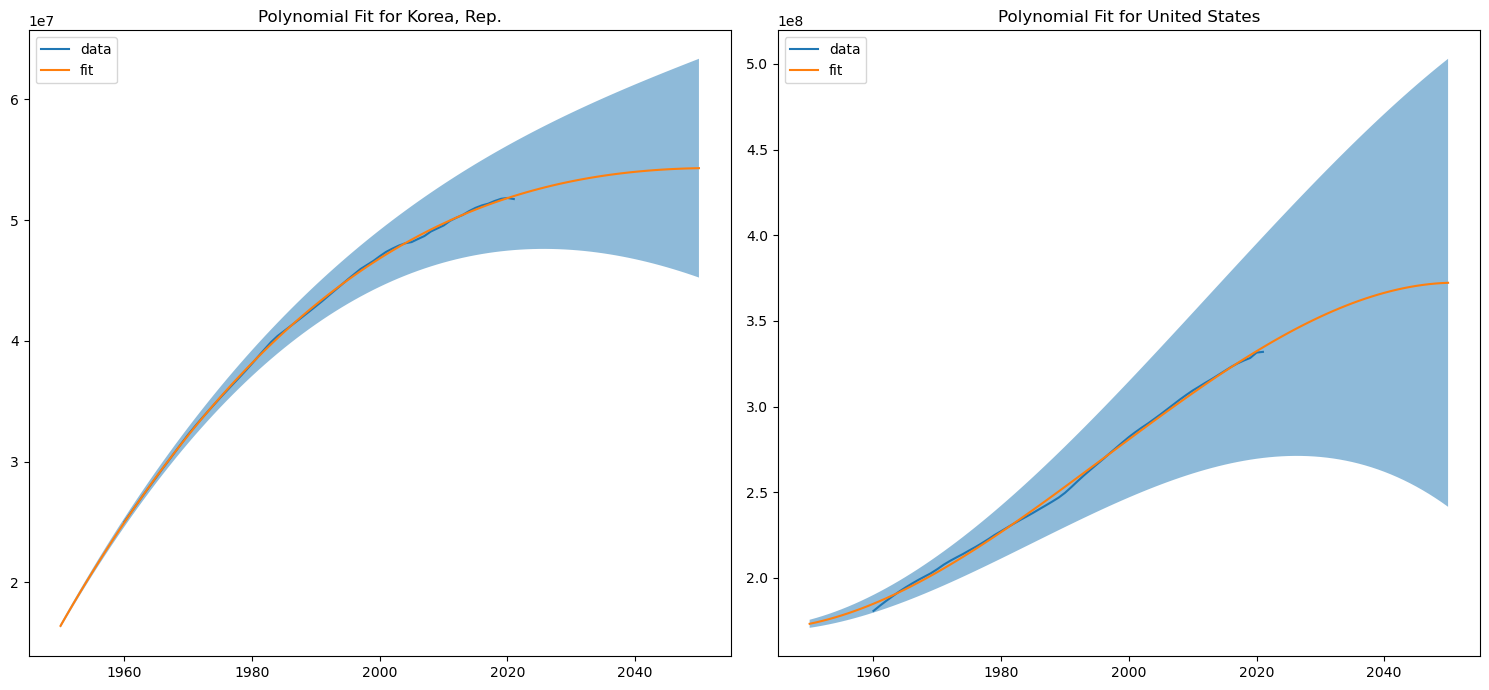

In [94]:
# Define the model function
def poly(t, c0, c1, c2, c3):
    """ Computes a polynomial c0 + c1*t + c2*t^2 + c3*t^3 """
    t = t - 1950
    f = c0 + c1*t + c2*t**2 + c3*t**3
    return f

def err_ranges(x, func, popt, perr):
    """ Calculate upper and lower errors """
    popt_up = popt + perr
    popt_dw = popt - perr
    fit = func(x, *popt)
    fit_up = func(x, *popt_up)
    fit_dw = func(x, *popt_dw)
    return fit_up, fit_dw

# Ensure index is of integer type
df_pop_countries.index = df_pop_countries.index.astype(int)

# Initialize a figure
fig, axs = plt.subplots(1, 2, figsize=(15,7))

# Loop over the countries list
for i, country in enumerate(countries):
    popt, pcorr = curve_fit(poly, df_pop_countries.index, df_pop_countries[country])
    print(f"Fit parameters for {country}: ", popt)
    # extract variances and calculate sigmas
    sigmas = np.sqrt(np.diag(pcorr))
    # call function to calculate upper and lower limits with extrapolation
    # create extended year range
    years = np.arange(1950, 2051)
    lower, upper = err_ranges(years, poly, popt, sigmas)
    axs[i].plot(df_pop_countries.index, df_pop_countries[country], label="data")
    axs[i].plot(years, poly(years, *popt), label="fit")
    # plot error ranges with transparency
    axs[i].fill_between(years, lower, upper, alpha=0.5)
    axs[i].set_title(f"Polynomial Fit for {country}")
    axs[i].legend(loc="upper left")

# Adjust layout for neatness
plt.tight_layout()
plt.show()